# Aproximação para valor de $\pi$

Notebook desenvolvido para estimar um valor aproximado para $\pi$ pelo [método de Monte Carlos](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Monte_Carlo), um método estatístico para determinar resultados númericos aproximados.

# Módulos

In [1]:
from random import random, randrange
from math import cos, sin, sqrt, pi
import matplotlib.pyplot as plt

# Desenhos

## Construção da Circunferência

Função que gerar as coordenadas necessárias para construção da circunferência, por padrão o centro tem coordenada $(0,0)$ e valor de raio $r=1$.

In [2]:
def circunferencia(x = 0, y = 0, raio = 1):
    # Criar uma lista com as coordenadas da circunferencia de raio r com centro em (x,y)
    
    pontos = [(x+raio*cos(pi*angulo/180), y + raio*sin(pi*angulo/180)) for angulo in range(361)]
    return pontos

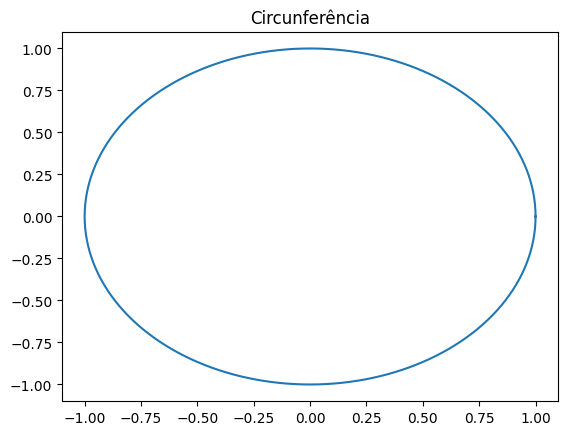

In [3]:
# Separado as coordenadas da circunferencia
coordenadas_x, coordenadas_y = zip(*circunferencia())

# Convertendo em listas
coordenadas_x = list(coordenadas_x)
coordenadas_y = list(coordenadas_y)

# Gráfico
plt.plot(coordenadas_x,coordenadas_y)
plt.title('Circunferência')

plt.show()

## Construçõa de quadrado

Função que constroi um quadrado de forma que a circunferência esteja inscrita no quadrado

In [4]:
def quadrado(x = 0, y = 0, raio = 1):
    # Definir as coordenadas dos vértices de um quadrado que tem inscrito uma circunferência de raio r e centro em (x,y)
    
    a = (x - raio, y - raio)
    b = (x + raio, y - raio)
    c = (x + raio, y + raio)
    d = (x - raio, y + raio)
    
    return [a,b,c,d]

In [5]:
quadrado()

[(-1, -1), (1, -1), (1, 1), (-1, 1)]

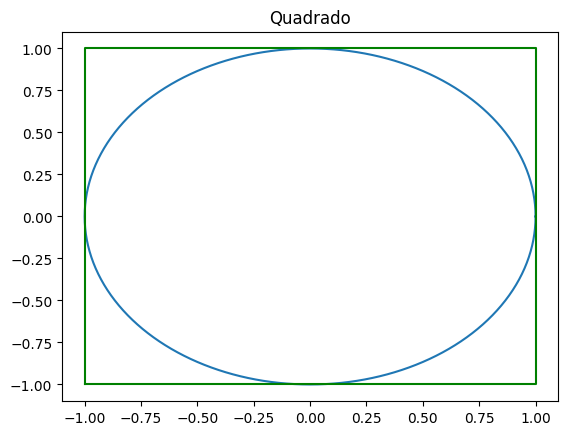

In [6]:
# Separado as coordenadas da circunferencia
coordenadas_x, coordenadas_y = zip(*circunferencia())

# Convertendo em listas
coordenadas_x = list(coordenadas_x)
coordenadas_y = list(coordenadas_y)

# Cooordenadas dos vertices dos quadrado
coordenadas_z, coordenadas_t = zip(*quadrado())

# Convertendo em listas
coordenadas_z = list(coordenadas_z)
coordenadas_t = list(coordenadas_t)

# Adicionando o primeiro elemento da lista para fecha o quadrado
coordenadas_z.append(coordenadas_z[0])
coordenadas_t.append(coordenadas_t[0])

#Desenho
plt.plot(coordenadas_x, coordenadas_y)
plt.plot(coordenadas_z, coordenadas_t,'g')
plt.title('Quadrado')

plt.show()

## Gerar pontos aleatórios
Função que gerar as coordenadas de pontos aleatórios que estejam contidos no quadrado que circunscrever uma circunferência, utilizando como parâmetros a coordenada do centro da circunferência e seu raio.

In [7]:
def pontos(x = 0, y = 0, raio = 1, n = 10):
    # Gerar coordenadas de n pontos aleatórios contidos dentro de um quadrado com centro (x,y) e lado l = 2*raio
    
    pontos = [(x + (-1)**randrange(1,3)*raio*random(), y + (-1)**randrange(1,3)*raio*random()) for i in range(n)]
    
    return pontos

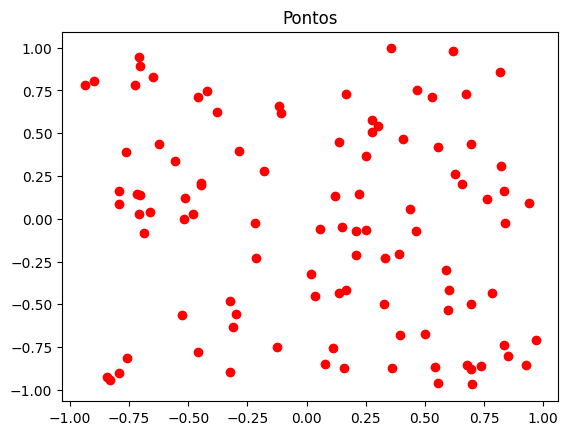

In [8]:
# Separado as coordenadas dos n pontos
coordenadas_x, coordenadas_y = zip(*pontos(n=100))

# Convertendo em listas
coordenadas_x = list(coordenadas_x)
coordenadas_y = list(coordenadas_y)

#Desenho
plt.plot(coordenadas_x, coordenadas_y, color='r', marker='o', linestyle='')
plt.title('Pontos')

plt.show()

## Juntado as funções

Juntado as três funções

In [9]:
def desenho(x = 0, y = 0, raio = 1, n = 100):
    # Desenha uma quadrado que tem um circunferência inscrita a partir dos centro da circunferência (x,y) e seu raio, assim como n pontos aleátorios
    # contidos dentro desse quadrado

    # Separado as coordenadas
    coordenadas_x, coordenadas_y = zip(*circunferencia(x,y,raio)) # Separado as coordenadas da circunferencia
    coordenadas_z, coordenadas_t = zip(*quadrado(x,y,raio)) # Cooordenadas dos vertices dos quadrado
    coordenadas_u, coordenadas_v = zip(*pontos(x,y,raio,n)) # Separado as coordenadas dos n pontos
    
    # Convertendo em listas
    coordenadas_x = list(coordenadas_x)
    coordenadas_y = list(coordenadas_y)
    coordenadas_z = list(coordenadas_z)
    coordenadas_t = list(coordenadas_t)
    coordenadas_u = list(coordenadas_u)
    coordenadas_v = list(coordenadas_v)

    # Adicionando o primeiro elemento da lista para fecha o quadrado
    coordenadas_z.append(coordenadas_z[0])
    coordenadas_t.append(coordenadas_t[0])
    
    # Gráfico
    plt.plot(coordenadas_x,coordenadas_y) #Circunferência
    plt.plot(coordenadas_z, coordenadas_t,'g') #Quadrado
    plt.plot(coordenadas_u, coordenadas_v, color='r', marker='o', linestyle='') #Pontos
   
    plt.show()

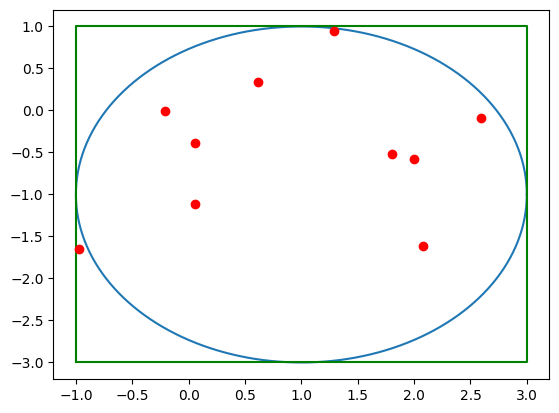

In [10]:
desenho(x=1,y=-1,raio=2,n=10)

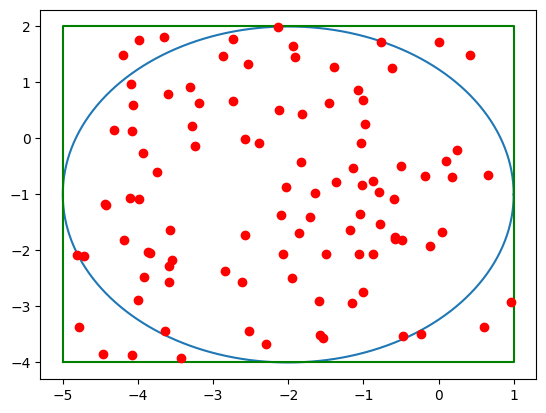

In [11]:
desenho(x=-2,y=-1,raio=3,n=100)

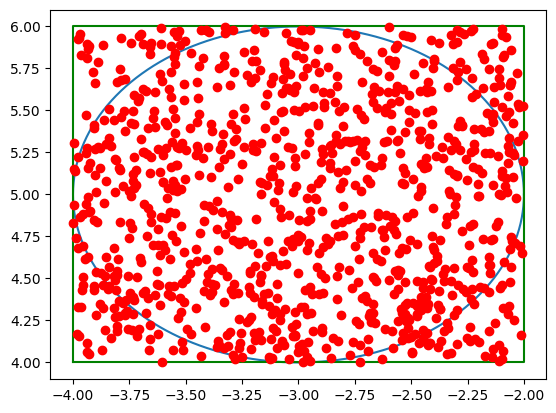

In [12]:
desenho(x=-3,y=5,raio=1,n=1000)

# Método de Monte Carlos para aproximação

Sendo $n$ o número de pontos contidos na crcunfêrencia e $m$ o número de pontos contidos no quadrado, admitidos esses pontos gerados de maneira aleatório, esperamos que a razão $n/m$ fique cada vez mais próxima da razão $A_{c}$/$A_{q}$ , onde $A_{c}$ corresponde a área da circunferência e $A_{q}$ a área do quadrado.

$$\frac{A_{c}}{A_{q}}\approx\frac{n}{m}\to\frac{\pi\cdot r^{2}}{(2\cdot r)^2}\approx\frac{n}{m}\to\pi\approx 4\cdot\frac{n}{m}$$

## Verificação dos pontos

In [13]:
def validacao_circunferencia(x, y, centro = (0,0), raio = 1):
    # Verifica se o ponto (x,y) está dentro da circunferência de raio r e centro em (centro[0], centro[1])
    # Retorna True se os pontos estão dentro da circunferência e False caso contrário

    return sqrt((x - centro[0])**2 + (y - centro[1])**2) <= raio

In [14]:
validacao_circunferencia(0,0,centro=(0,0),raio=1) # True

True

In [15]:
validacao_circunferencia(1,1,centro=(0,0),raio=1) # False

False

In [16]:
def validacao_quadrado(x, y, centro = (0,0), raio = 1):
    # Verifica se o ponto (x,y) está dentro do quadrado de lado l = 2*raio e centro em (centro[0], centro[1])
    # Retorna True se os pontos estão dentro do quadrado e False caso contrário

    return abs(x - centro[0]) <= raio and abs(y - centro[1]) <= raio

In [17]:
validacao_quadrado(0,1,centro=(0,0),raio=1) # True

True

In [18]:
validacao_quadrado(1,2,centro=(0,0),raio=1) # False

False

In [19]:
def numero_pontos(x = 0, y = 0, raio = 1, n = 1000):
    # Gerar n pontos aleatórios contidos dentro de um quadrado com centro (x,y) e lado l = 2*raio
    # Retorna o número de pontos que estão dentro da circunferência e número de pontos que estão fora da circunferência

    pontos_gerados = pontos(x,y,raio,n)
    
    dentro_circunferencia = [validacao_circunferencia(ponto[0],ponto[1],centro=(x,y),raio=raio) for ponto in pontos_gerados]
    dentro_quadrado = [validacao_quadrado(ponto[0],ponto[1],centro=(x,y),raio=raio) for ponto in pontos_gerados]

    return sum(dentro_circunferencia), sum(dentro_quadrado) - sum(dentro_circunferencia)

In [20]:
numero_pontos(x=0,y=0,raio=1,n=1000)

(791, 209)

## Aproximação para $\pi$

In [21]:
def aproximacao_pi(n):
    # Aproxima o valor de pi a partir da razão entre o número de pontos que estão dentro da circunferência e o número de pontos que estão fora da circunferência
    # Retorna o valor aproximado de pi

    dentro_circunferencia, fora_circunferencia = numero_pontos(n=n)

    return 4*dentro_circunferencia/(dentro_circunferencia + fora_circunferencia)

In [22]:
# Aproximações
aproximacoes = [(numero_pontos, aproximacao_pi(numero_pontos)) for numero_pontos in range(1,1000)]

# Separado as coordenadas dos n pontos
numeros_pontos, valores_pi = zip(*aproximacoes)

# Convertendo em listas
numeros_pontos = list(numeros_pontos)
valores_pi = list(valores_pi)

# Erro percentual absoluto
diferenca = [abs((valor/pi)-1)*100 for valor in valores_pi]

## Gráficos

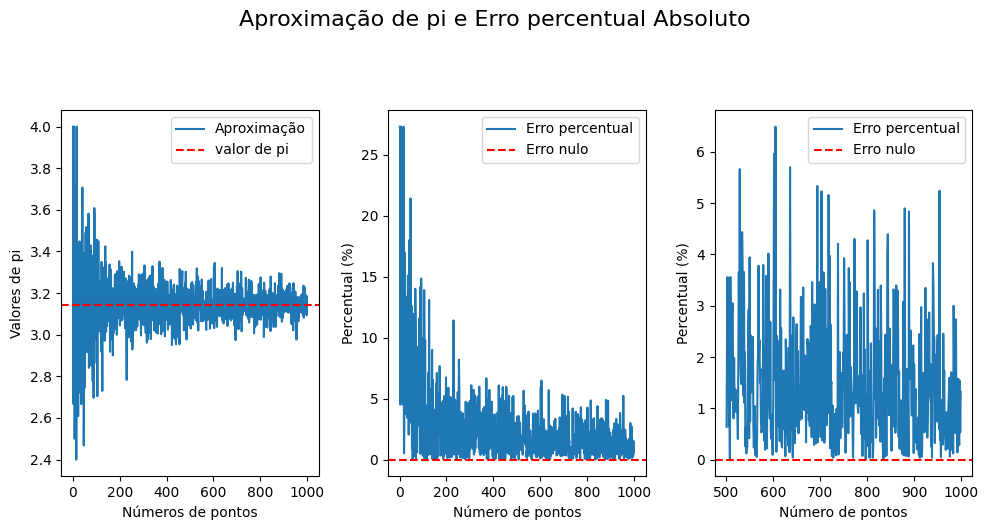

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].plot(numeros_pontos, valores_pi, label='Aproximação')
axes[0].axhline(y=pi, color='r', linestyle='--', label='valor de pi')
axes[0].set_xlabel('Números de pontos')
axes[0].set_ylabel('Valores de pi')
axes[0].legend()

axes[1].plot(numeros_pontos, diferenca, label='Erro percentual')
axes[1].axhline(y=0, color='r', linestyle='--', label='Erro nulo')
axes[1].set_xlabel('Número de pontos')
axes[1].set_ylabel('Percentual (%)')
axes[1].legend()

axes[2].plot(numeros_pontos[500:], diferenca[500:], label='Erro percentual')
axes[2].axhline(y=0, color='r', linestyle='--', label='Erro nulo')
axes[2].set_xlabel('Número de pontos')
axes[2].set_ylabel('Percentual (%)')
axes[2].legend()

plt.tight_layout() # Ajustar espaçamento
plt.suptitle('Aproximação de pi e Erro percentual Absoluto', fontsize=16, y=1.05)
plt.subplots_adjust(top=0.85)  # Ajusta o espaço para o título
plt.show()

Com base nos gráficos apresentados anteriormente, observa-se que, à medida que o número de pontos aumenta, o valor calculado para $\pi$ se aproxima cada vez mais do seu valor real. Quando o número de pontos é pequeno, o erro pode chegar a até 50%; no entanto, a partir de 500 pontos, o erro não ultrapassa 7%.